In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import numpy as np
import time

Extracting links of each job

In [9]:
driver.get("https://www.instahyre.com/search-jobs/")
link = set()

def each_page_links():
    element = driver.find_elements(By.ID,'employer-profile-opportunity')
    for i in element:
        link.add(i.get_attribute('ng-href'))

for i in range(40):
    each_page_links()
    button = driver.find_element("xpath",'//*[@ng-click="nextPage()"]')
    if button:
        button.click()
        time.sleep(2)



In [24]:
link

{'https://www.instahyre.com/job-272790-relationship-manager-drive-at-axis-bank-bangalore-mumbai/',
 'https://www.instahyre.com/job-272791-relationship-manager-drive-at-axis-bank-delhi-kolkata/',
 'https://www.instahyre.com/job-278852-growth-intern-internship-drive-at-dyte-work-from-home/',
 'https://www.instahyre.com/job-280387-seo-executive-drive-at-big-oh-tech-noida/',
 'https://www.instahyre.com/job-280580-recruitment-coordinator-internship-drive-at-bitgo-bangalore/',
 'https://www.instahyre.com/job-281572-customer-service-executive-drive-at-1mg-noida/',
 'https://www.instahyre.com/job-282265-content-marketer-drive-at-open-financial-technologies-bangalore/',
 'https://www.instahyre.com/job-282273-it-recruiter-drive-at-syndr-delhi/',
 'https://www.instahyre.com/job-282701-account-executive-drive-at-fincent-bangalore-mumbai/',
 'https://www.instahyre.com/job-282705-content-writer-drive-at-geoiq-bangalore/',
 'https://www.instahyre.com/job-282725-software-engineer-drive-at-insightsoftw

In [40]:
final_list_link = list(link)
# Create a DataFrame from the list
df = pd.DataFrame({'Links': final_list_link})

In [48]:
df.duplicated().sum()

0

In [47]:
df.duplicated().sum()
path =  "C:\\Users\\91982\\OneDrive\\Desktop\\Shivanni\\LINKS_780.csv"
df.to_csv(path, index=False)

In [5]:
df

,Links
0,https://www.instahyre.com/job-284939-serviceno...
1,https://www.instahyre.com/job-284712-ios-devel...
2,https://www.instahyre.com/job-284462-php-larav...
3,https://www.instahyre.com/job-284731-senior-so...
4,https://www.instahyre.com/job-285449-sde-4-ios...
...,...
775,https://www.instahyre.com/job-284813-tech-lead...
776,https://www.instahyre.com/job-284433-lead-gene...
777,https://www.instahyre.com/job-285077-sr-applic...
778,https://www.instahyre.com/job-285425-infrastru...


In [28]:
from selenium import webdriver

JOB = []
driver = webdriver.Firefox()
no = 1

for i in df['Links']:
    driver.switch_to.window(driver.window_handles[-1])
    driver.get(i)


    try:
        intern = driver.find_element(By.XPATH, '//*[@id="employer-profile"]/div[2]/div/div/div[2]/div[2]/div[1]/div/h2')
        if "Internship Details" in intern.text:
            inv = 'Internship'
            experience = None
    except:
        inv = "Full Time"
        exper = driver.find_element(By.XPATH, '//*[@id="floating-header"]/div[1]/div/span[2]')
        experience = exper.text

    Linkedin = driver.find_element(By.ID, 'employer-linkedin').get_attribute('href')
    hr = driver.find_element(By.CLASS_NAME, "rec-name")
    Company = driver.find_element(By.XPATH, '//*[@id="employer-profile"]/div[2]/div/div/div[1]/div[2]/h5')
     # try:
    # established = driver.find_element(By.XPATH, '//*[@id="employer-profile"]/div[2]/div/div/div[1]/div[2]/div[1]')
    # except NoSuchElementException:
    #     established = None   
    
    established = driver.find_element(By.XPATH, '//*[@id="employer-profile"]/div[2]/div/div/div[1]/div[2]/div[1]')
    No_employees = driver.find_element(By.XPATH, '//*[@id="employer-profile"]/div[2]/div/div/div[1]/div[2]/div[2]')
    location = driver.find_element(By.XPATH, '//*[@id="floating-header"]/div[1]/div/span[1]')
    designation = driver.find_element(By.CLASS_NAME, "profile-info")
    
    # try:
    # established = driver.find_element(By.XPATH, '//*[@id="employer-profile"]/div[2]/div/div/div[1]/div[2]/div[1]')
    # except NoSuchElementException:
    #     established = None

    # Check if job description exists
    try:
        skills = driver.find_element(By.XPATH, '//*[@id="job-description"]/div/div/div[1]')
        skills_text = ' , '.join(skills.text.split())
    except NoSuchElementException:
        skills_text = None

    JOB.append({'Company': Company.text,
                  "Founded": established.text,
                  "Numb_of_empl": No_employees.text,
                  "Location": location.text,
                  "Designation": designation.text,
                  "Involvement": inv,
                  "Skills": skills_text,
                  "HR": hr.text,
                  "Experience": experience,
                  "Linkedin": Linkedin,
                  })

    # Open a new tab to extract another company
    driver.execute_script("window.open('');")
    # Switching to the last tab
    driver.switch_to.window(driver.window_handles[0])
    # Close the current tab
    driver.close()
    no += 1

driver.quit()


In [30]:
JOB

[{'Company': 'Persistent Systems at a glance',
  'Founded': 'Founded in 1990',
  'Numb_of_empl': 'More than 1000 employees',
  'Location': 'Pune',
  'Designation': 'Automation Testing Lead\nPersistent Systems\nPune7-12 Years',
  'Involvement': 'Full Time',
  'Skills': 'Java , Selenium , API , Testing , Postman , SQL',
  'HR': 'Vaishnavi Aloni',
  'Experience': '7-12 Years',
  'Linkedin': 'https://www.linkedin.com/company/persistent-systems/'},
 {'Company': 'Flatworld Solutions at a glance',
  'Founded': 'Founded in 2002',
  'Numb_of_empl': 'More than 1000 employees',
  'Location': 'Bangalore',
  'Designation': 'Dot .NET - Angular Developer\nFlatworld Solutions\nBangalore3-7 Years',
  'Involvement': 'Full Time',
  'Skills': '.NET , Angular , C# , ASP.NET , SQL , Server',
  'HR': 'Nayana Patil',
  'Experience': '3-7 Years',
  'Linkedin': 'https://www.linkedin.com/company/flatworld-solutions/'},
 {'Company': 'Beem at a glance',
  'Founded': 'Founded in 2020',
  'Numb_of_empl': '50 - 200 e

In [49]:
final_df=pd.DataFrame(JOB)
final_df

,Company,Founded,Numb_of_empl,Location,Designation,Involvement,Skills,HR,Experience,Linkedin
0,Lumen Solutions at a glance,Founded in 2011,10 - 50 employees,Bangalore,ServiceNow Developer\nLumen Solutions\nBangalo...,Full Time,"ServiceNow , ITSM",Jeevitha N A,3-8 Years,https://www.linkedin.com/company/lumen-solutio...
1,IRIS hightech at a glance,Founded in 2008,50 - 200 employees,Mumbai,iOS Developer\nIRIS hightech\nMumbai3-8 Years,Full Time,"iOS , Swift , Flutter , Android , Objective-C",Pooja Dharmik,3-8 Years,https://www.linkedin.com/company/iris-hightech...
2,CS Soft Solutions at a glance,Founded in 2009,200 - 500 employees,Work From Home,PHP - Laravel Developer\nCS Soft Solutions\nWo...,Full Time,"PHP , Laravel",Opportunity Rm,7-11 Years,https://www.linkedin.com/company/cssoft-soluti...
3,Nissan Digital at a glance,Founded in 2018,200 - 500 employees,Trivandrum,Senior Software Engineer\nNissan Digital\nTriv...,Full Time,"Java , Spring , Microservices",Jebastin David,5-8 Years,https://www.linkedin.com/company/nissan-digita...
4,PhysicsWallah at a glance,Founded in 2014,More than 1000 employees,Bangalore,SDE 4 - iOS Developer\nPhysicsWallah\nBangalor...,Full Time,"iOS , Swift , Objective-C , SwiftUI",Aditi Pradhan,7-10 Years,https://in.linkedin.com/company/physicswallaha...
...,...,...,...,...,...,...,...,...,...,...
103,Silicon Stack at a glance,Founded in 2016,,Pune,Tech Lead\nSilicon Stack\nPune8-13 Years,Full Time,"Java , Agile , Spring , Boot , Microservices ,...",Swatee Paithankar,8-13 Years,https://www.linkedin.com/company/silicon-stack
104,Xerago at a glance,Founded in 2002,200 - 500 employees,Chennai,Lead Generation\nXerago\nChennai0-0 Years,Full Time,"Lead , Generation , Sales",Harish Sankar,0-0 Years,https://www.linkedin.com/company/xerago/about/
105,Symphony Technology Group at a glance,Founded in 2002,10 - 50 employees,Bangalore,Sr. Application Support Engineer\nSymphony Tec...,Full Time,"L2 , Support , L1 , Support , Customer , Service",Udeshna Boruah Kalita,6-9 Years,https://www.linkedin.com/company/symphony-tech...
106,InMobi at a glance,Founded in 2007,More than 1000 employees,Bangalore,Infrastructure Specialist (on - Prem & Cloud)\...,Full Time,"IT , Infrastructure , Windows",Nandana Ss,3-7 Years,https://www.linkedin.com/company/inmobi/


In [55]:
final_df.duplicated().sum()

20

In [57]:
final_df.drop_duplicates(inplace=True)

In [71]:
path= r'C:\Users\91982\OneDrive\Desktop\Shivanni\job Analysis\Final.csv'
final_df.to_csv(path)

In [100]:
final_df.columns

Index(['Unnamed: 0', 'Company', 'Founded', 'Numb_of_empl', 'Location',
       'Designation', 'Involvement', 'Skills', 'HR', 'Experience', 'Linkedin'],
      dtype='object')

In [102]:
lookup = pd.DataFrame({'Company': final_df['Company'].unique()})
lookup['CompanyID'] = range(1000, 1000 + len(lookup)) 
final_df = final_df.merge(lookup, on='Company', how='left')


In [115]:
final_df['Job_id']=final_df.index
final_df['Job_id']=final_df['Job_id'] + 1

In [122]:
det_id = pd.DataFrame({'Skills': final_df['Skills'].unique()})
det_id['det_id'] = range(525, 525 + len(det_id)) 
final_df = final_df.merge(det_id, on='Skills', how='left')

### DATA CLEANING

In [32]:
import pandas as pd

In [33]:
final_df=pd.read_csv(r'C:\Users\91982\OneDrive\Desktop\Shivanni\job Analysis\Final.csv')

In [34]:
final_df.drop('Unnamed: 0',axis=1,inplace=True)

In [35]:
final_df['Numb_of_empl']=final_df['Numb_of_empl'].str.replace('employees','')
final_df['Numb_of_empl'].fillna(final_df['Numb_of_empl'].mode()[0],inplace=True)

In [36]:
for i in final_df:
    final_df[i].fillna(final_df[i].mode()[0],inplace=True)

In [37]:
import numpy as np

In [38]:
final_df.isna().sum()

Company         0
Founded         0
Numb_of_empl    0
Location        0
Designation     0
Involvement     0
Skills          0
HR              0
Experience      0
Linkedin        0
dtype: int64

In [39]:
final_df['Company']=final_df['Company'].str.replace('at a glance','')

In [40]:
final_df['Founded']=final_df['Founded'].str.replace('[^0-9]','',regex=True).astype(int)

In [41]:
final_df['Designation']=final_df['Designation'].str.split('\n',expand=True)[0]

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       768 non-null    object
 1   Founded       768 non-null    int32 
 2   Numb_of_empl  768 non-null    object
 3   Location      768 non-null    object
 4   Designation   768 non-null    object
 5   Involvement   768 non-null    object
 6   Skills        768 non-null    object
 7   HR            768 non-null    object
 8   Experience    768 non-null    object
 9   Linkedin      768 non-null    object
dtypes: int32(1), object(9)
memory usage: 57.1+ KB


In [13]:
# jobs=final_df[['Job_id','CompanyID','Location','Designation','det_id']]
# path= r'C:\Users\91982\OneDrive\Desktop\Shivanni\job Analysis\jobs_table.csv'
# jobs.to_csv(path)

In [14]:
# company=final_df[['CompanyID','Company','Founded','Numb_of_empl']]
# path= r'C:\Users\91982\OneDrive\Desktop\Shivanni\job Analysis\company.csv'
# company.to_csv(path)

In [15]:
# details =final_df[['det_id','Involvement','Skills', 'HR']]
# path= r'C:\Users\91982\OneDrive\Desktop\Shivanni\job Analysis\details.csv'
# details.to_csv(path)

In [16]:
pd.set_option('display.max_rows', None)

In [43]:
final_df['Numb_of_empl'].unique()

array(['10 - 50 ', '50 - 200 ', '200 - 500 ', 'More than 1000 ',
       '500 - 1000 ', '0 - 10 '], dtype=object)

In [18]:
pd.set_option('display.max_rows', 10)

In [44]:
final_df['Numb_of_empl']

0             10 - 50 
1            50 - 200 
2           200 - 500 
3           200 - 500 
4      More than 1000 
            ...       
763    More than 1000 
764         200 - 500 
765           10 - 50 
766    More than 1000 
767          50 - 200 
Name: Numb_of_empl, Length: 768, dtype: object

In [20]:

final_df['Numb_of_empl'].str.replace('More than','0').str.replace('-','').str.split(' ',expand=True)

,0,1,2,3
0,10,,50,
1,50,,200,
2,200,,500,
3,200,,500,
4,0,1000,,None
...,...,...,...,...
763,0,1000,,None
764,200,,500,
765,10,,50,
766,0,1000,,None


In [45]:
final_df['Numb_of_empl']=final_df['Numb_of_empl'].replace('[^0-9]',' ',regex=True).str.strip().str.split(' ').str[-1]
final_df['Numb_of_empl'].fillna(final_df['Numb_of_empl'].mode()[0],inplace=True)

## MODEL CREATION

In [22]:
final_df.columns

Index(['Company', 'Founded', 'Numb_of_empl', 'Location', 'Designation',
       'Involvement', 'Skills', 'HR', 'Experience', 'Linkedin'],
      dtype='object')

In [46]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = final_df[['Numb_of_empl']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

final_df['Cluster']=cluster_labels

C:\Users\91982\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91982\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [48]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.9799828050239233


In [47]:
final_df['Cluster'].unique()

array([2, 3, 0, 1])

In [50]:
final_df['Cluster']=final_df['Cluster'].map({0: 'Class2',1: 'Class4',2: 'Class1',3: 'Class3'})


In [27]:
final_df['Numb_of_empl']=final_df['Numb_of_empl'].astype(int)

In [52]:
import matplotlib.pyplot as plt

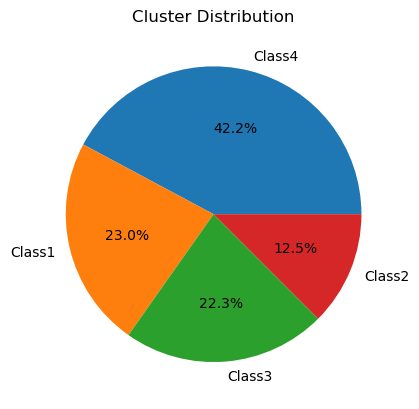

In [54]:
cluster_counts=final_df['Cluster'].value_counts()
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title('Cluster Distribution')
plt.show()


C:\Users\91982\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91982\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\91982\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91982\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

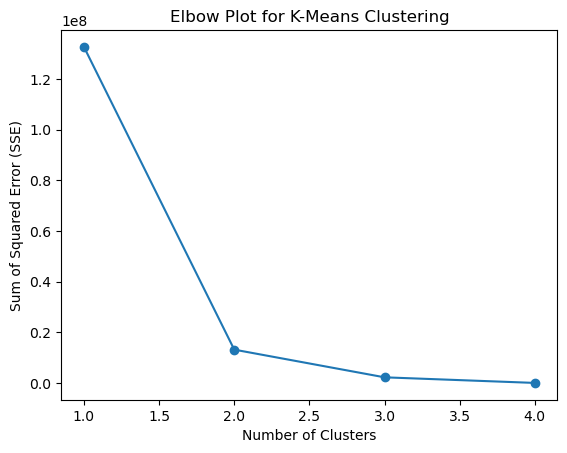

In [57]:
# Calculate Sum of Squared Error (SSE) for each cluster number
sse_values = []
for num_clusters in range(1, 5):
    kmeans = KMeans(n_clusters=num_clusters, random_state=13)
    kmeans.fit(final_df[['Numb_of_empl']])
    sse_values.append(kmeans.inertia_)  # SSE is also stored in 'inertia_'

# Plot the elbow plot
plt.plot(range(1, 5), sse_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Plot for K-Means Clustering')
plt.show()

In [ ]:
pd.set_option('display.maximum')

In [58]:
final_df['Company']

0                Lumen Solutions 
1                  IRIS hightech 
2              CS Soft Solutions 
3                 Nissan Digital 
4                  PhysicsWallah 
                  ...            
763                Silicon Stack 
764                       Xerago 
765    Symphony Technology Group 
766                       InMobi 
767            MTAP Technologies 
Name: Company, Length: 768, dtype: object

In [63]:
final_df.to_csv(r'C:\Users\91982\OneDrive\Desktop\Shivanni\job Analysis\JOB_FINAL.csv')